### Examples of data objects

The library supports three data types `Tabular`, `Image` and `Text` defined in the modules `omnixai.data.tabular`, `omnixai.data.image` and `omnixai.data.text`, respectively. All the supported explainers take one of these data objects as their inputs when generating explanations, e.g., an explainer vision tasks takes an `Image` object as its input. These data objects can be constructed easily from pandas dataframes, numpy arrays, Pillow images or strings. This notebook will show how to use these data objects.

#### Tabular data
Suppose we have a pandas dataframe representing a tabular dataset with both categorical and continuous-valued features:

In [1]:
import pandas as pd

df = pd.DataFrame(
    data=[[1, 2, 3, 'male'], [4, 5, 6, 'female']],
    columns=['a', 'b', 'c', 'd']
)

The first three columns are continuous-valued features and the last column is the categorical feature. Given this dataframe, we can easily construct a `Tabular` instance by specifying the dataframe and the categorical columns:

In [2]:
from omnixai.data.tabular import Tabular

x = Tabular(
    data=df,
    categorical_columns=['d']
)
print(x)

   a  b  c       d
0  1  2  3    male
1  4  5  6  female


If we want to construct a `Tabular` instance with a numpy array, we need to set the feature columns:

In [3]:
x = Tabular(
    data=df.values,
    feature_columns=['a', 'b', 'c', 'd'],
    categorical_columns=['d']
)
print(x)

   a  b  c       d
0  1  2  3    male
1  4  5  6  female


`Tabular` has several useful methods:

In [4]:
# Get the data shape
print(f"Shape: {x.shape}")
# Get the raw data values
print(f"Raw values:\n {x.values}")
# Get the categorical feature columns
print(f"Categorical features: {x.categorical_columns}")
# Get the continuous-valued feature columns
print(f"Continuous-valued features: {x.continuous_columns}")
# Get all the feature columns
print(f"All feature columns: {x.feature_columns}")

Shape: (2, 4)
Raw values:
 [[1 2 3 'male']
 [4 5 6 'female']]
Categorical features: ['d']
Continuous-valued features: ['a', 'b', 'c']
All feature columns: ['a', 'b', 'c', 'd']


A `Tabular` instance can be converted into a pandas dataframe or a numpy array:

In [5]:
print(x.to_pd())
print(x.to_numpy())

   a  b  c       d
0  1  2  3    male
1  4  5  6  female
[[1 2 3 'male']
 [4 5 6 'female']]


The dataset represented by `Tabular` may have a target/label column, e.g., class labels in classification tasks. In the following example, the last column is the target/label column.

In [6]:
df = pd.DataFrame(
    data=[[1, 2, 3, 'male', 'yes'], [4, 5, 6, 'female', 'no']],
    columns=['a', 'b', 'c', 'd', 'label']
)

To construct a `Tabular` instance, besides setting categorical feature columns, we also need to set the target/label column:

In [7]:
x = Tabular(
    data=df,
    categorical_columns=['d'],
    target_column='label'
)
print(x)
print(f"Target column: {x.target_column}")

   a  b  c       d label
0  1  2  3    male   yes
1  4  5  6  female    no
Target column: label


To get a subset of the rows of `x`:

In [8]:
print("The first row:")
print(x[0])
print("The second row:")
print(x[1])
print("Swap the two rows:")
print(x[[1, 0]])

The first row:
   a  b  c     d label
0  1  2  3  male   yes
The second row:
   a  b  c       d label
1  4  5  6  female    no
Swap the two rows:
   a  b  c       d label
1  4  5  6  female    no
0  1  2  3    male   yes


#### Image data
An `Image` object can be constructed from a numpy array (a batch of images) or a Pillow image. For example, a numpy array contains a batch of MNIST digit images:

In [9]:
import torchvision

test_data = torchvision.datasets.MNIST(root='../data', train=False, download=True)
imgs = test_data.data.numpy()
print(imgs.shape)

(10000, 28, 28)


An `Image` object can be created as follows:

In [10]:
from omnixai.data.image import Image

# `batched = True` means `data` contains a batch of images with 
# shape `(batch_size, height, width)` or `(batch_size, height, width, channel)`.
images = Image(data=imgs, batched=True)

Here are some useful functions:

In [11]:
print(f"Data shape: {images.shape}")
print(f"Image shape: {images.image_shape}")

print(f"The first image (Pillow):")
display(images[0].to_pil())
print(f"The second image (Pillow):")
display(images[1].to_pil())

print("Loop:")
for im in images[:5]:
    print(im.shape)

Data shape: (10000, 28, 28, 1)
Image shape: (28, 28, 1)
The first image (Pillow):


The second image (Pillow):


Loop:
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)


We can also convert `Image` into a numpy array:

In [12]:
print(f"Numpy array shape: {images.to_numpy().shape}")
print(f"Numpy array shape: {images.to_numpy(keepdim=True).shape}")
print(f"Numpy array shape: {images.to_numpy(hwc=False, keepdim=True).shape}")

Numpy array shape: (10000, 28, 28)
Numpy array shape: (10000, 28, 28, 1)
Numpy array shape: (10000, 1, 28, 28)


A color image example:

Data shape: (1, 224, 224, 3)
Image shape: (224, 224, 3)
The image (Pillow):


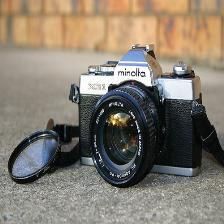

In [13]:
from PIL import Image as PilImage

img = Image(PilImage.open('../data/images/camera.jpg').convert('RGB'))
print(f"Data shape: {img.shape}")
print(f"Image shape: {img.image_shape}")
print(f"The image (Pillow):")
# `to_pil` returns a single Pillow image if `batch_size = 1` or a list of Pillow images if `batch_size > 1`.
display(img.to_pil())

In [14]:
print(f"Numpy array shape: {img.to_numpy().shape}")
print(f"Numpy array shape: {img.to_numpy(keepdim=True).shape}")
print(f"Numpy array shape: {img.to_numpy(hwc=False, keepdim=True).shape}")

Numpy array shape: (1, 224, 224, 3)
Numpy array shape: (1, 224, 224, 3)
Numpy array shape: (1, 3, 224, 224)


#### Text data
A `Text` object represents a batch of texts or sentences stored in a list. For example,

In [15]:
from omnixai.data.text import Text

x = Text([
    "What a great movie! if you have no taste.",
    "it was a fantastic performance!",
    "best film ever",
    "such a great show!",
    "it was a horrible movie",
    "i've never watched something as bad"
])

Here are some useful functions:

In [16]:
print(f"Number of sentences: {len(x)}")
print(f"The first sentence: {x[0]}")
print(f"Raw strings: {x.values}")

Number of sentences: 6
The first sentence: ['What a great movie! if you have no taste.']
Raw strings: ['What a great movie! if you have no taste.', 'it was a fantastic performance!', 'best film ever', 'such a great show!', 'it was a horrible movie', "i've never watched something as bad"]


Convert texts/sentences into a list of tokens:

In [17]:
print(x.to_tokens())

[['what', 'a', 'great', 'movie', '!', 'if', 'you', 'have', 'no', 'taste', '.'], ['it', 'was', 'a', 'fantastic', 'performance', '!'], ['best', 'film', 'ever'], ['such', 'a', 'great', 'show', '!'], ['it', 'was', 'a', 'horrible', 'movie'], ['i', "'ve", 'never', 'watched', 'something', 'as', 'bad']]


#### Time series data

The `Timeseries` class represents a time series. The values of metrics/variables are stored in a numpy array
with shape `(timestamps, num_variables)`. We can construct a ``Timeseries`` instance from a pandas dataframe, where the index indicates the timestamps and the columns are the variables.

In [18]:
from omnixai.data.timeseries import Timeseries
df = pd.DataFrame(
   [['2017-12-27', 1263.94091, 394.507, 16.530],
    ['2017-12-28', 1299.86398, 506.424, 14.162],
    ['2017-12-29', 1319.76541, 610.314, 15.173]],
   columns=['Date', 'Consumption', 'Wind', 'Solar']
)
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [19]:
ts = Timeseries.from_pd(df)
print(ts)

            Consumption     Wind   Solar
2017-12-27   1263.94091  394.507  16.530
2017-12-28   1299.86398  506.424  14.162
2017-12-29   1319.76541  610.314  15.173


Here are some useful functions:

In [20]:
print(f"Length of ts: {len(ts)}")
print(f"Length of ts: {ts.ts_len}")
print(f"Metrics: {ts.columns}")
print(f"Time-series shape: {ts.shape}")
print("Select rows:")
print(ts[[1, 0]])
print("To pandas dataframe:")
print(ts.to_pd())

Length of ts: 3
Length of ts: 3
Metrics: ['Consumption', 'Wind', 'Solar']
Time-series shape: (3, 3)
Select rows:
            Consumption     Wind   Solar
2017-12-28   1299.86398  506.424  14.162
2017-12-27   1263.94091  394.507  16.530
To pandas dataframe:
            Consumption     Wind   Solar
2017-12-27   1263.94091  394.507  16.530
2017-12-28   1299.86398  506.424  14.162
2017-12-29   1319.76541  610.314  15.173
